<a href="https://colab.research.google.com/github/sakuronohana/my_datascience/blob/master/udemy/mlaz/Part%206%20-%20Reinforcement%20Learning/Section%2032%20-%20Upper%20Confidence%20Bound%20(UCB)/Python/upper_confidence_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinforcement Learing

Reinforcement Learning (RL) bildet neben Supervised und Unsupervised Learning die dritte große Gruppe von Machine Learning Verfahren. RL ist eine am natürlichen Lernverhalten des Menschen orientierte Methode. Menschliches Lernen erfolgt, insbesondere in frühen Stadien des Lernens, häufig über eine einfache Exploration der Umwelt. Dabei sind unsere Handlungen im Rahmen des Lernproblems durch einen gewissen Aktionsraum definiert. Über "Trial and Error" werden die Auswirkungen verschiedener Handlungen auf unsere Umwelt beobachtet und bewertet. Als Reaktion auf unsere Handlungen erhalten wir von unserer Umgebung ein Feedback, abstrakt dargestellt in Form einer Belohnung oder Bestrafung. Dabei ist das Konzept der Belohnung bzw. Bestrafung nur in den allerwenigsten Fällen monetär zu verstehen. In vielen Fällen wird die Belohnung in Form von sozialer Akzeptanz, Lob anderer Menschen aber auch durch persönliches Wohlbefinden oder Erfolgserlebnisse ausgezahlt. Vielfach zeigt sich auch eine zeitliche Latenz zwischen Handlung und Belohnung. Hierbei versucht der Mensch häufig, durch sein Handeln die erwartete "Gesamtbelohnung" im Zeitverlauf zu maximieren und nicht nur unmittelbare Belohnungen zu generieren.

<img src='https://www.statworx.com/wp-content/uploads/reinforcement-learning.png' width='600'>

Reinforcement Learning besteht formal betrachtet aus fünf wichtigen Komponenten, nämlich (1) dem Agenten (agent), (2) der Umgebung (environment), (3) dem Status (state), (4) der Aktion (action) sowie (5) der Belohnung (reward). Grundsätzlich lässt sich der Ablauf wie folgt beschreiben: Der Agent führt in einer Umgebung zu einem bestimmten Status ($s_t$) eine Aktion ($a_t$) aus dem zur Verfügung stehenden Aktionsraum A durch, die zu einer Reaktion der Umgebung in Form einer Belohnungen ($r_t$) führt.

Die Reaktion der Umgebung auf die Aktion des Agenten beeinflusst nun wiederum die Wahl der Aktion des Agenten im nächsten Status ($s_{t+1}$). Über mehrere tausend, hunderttausend oder sogar millionen von Iterationen ist der Agent in der Lage, einen Zusammenhang zwischen seinen Aktionen und dem künftig zu erwartenden Nutzen in jedem Status zu approximieren und sich somit entsprechend optimal zu verhalten. Dabei befindet sich der Agent immer in einem Dilemma zwischen der Nutzung seiner bisher erworbenen Erfahrung auf der einen und der Exploration neuer Strategien zur Erhöhung der Belohnung auf der anderen Seite. Dies wird als "Exploration-Exploitation Dilemma" bezeichnet.

Die Approximation des Nutzens kann dabei modellfrei, also über reine Exploration der Umgebung erfolgen oder durch die Anwendung von Machine Learning Modellen, die den Nutzen einer Aktion versuchen zu approximieren. Letztere Variante wird insbesondere dann angewendet, wenn der Status- und/oder Aktionsraum von hoher Dimensionalität ist

Quelle: [STATWORX Blog](https://www.statworx.com/ch/blog/einfuehrung-in-reinforcement-learning-wenn-maschinen-wie-menschen-lernen/)

## Multi-Armed Bandit Problem

Das Dilemma zwischen Exploration (Erkundung) und Exploitation (Ausbeutung) besteht in vielen Aspekten unseres Lebens. Sagen wir, Ihr Lieblingsrestaurant ist gleich um die Ecke. Wenn Sie jeden Tag dorthin gehen, wären Sie zuversichtlich, was Sie bekommen werden, aber Sie verpassen die Chance, eine noch bessere Option zu entdecken. Wenn Sie ständig neue Orte ausprobieren, werden Sie sehr wahrscheinlich von Zeit zu Zeit unangenehmes Essen zu sich nehmen müssen. In ähnlicher Weise versuchen Online-Berater, ein Gleichgewicht zwischen den bekanntermaßen attraktivsten Anzeigen und den neuen Anzeigen zu finden, die vielleicht sogar noch erfolgreicher sind.

Wenn wir alle Informationen über die Umwelt gelernt haben, sind wir in der Lage, die beste Strategie zu finden, indem wir auch nur Brute-Force simulieren, ganz zu schweigen von vielen anderen intelligenten Ansätzen. Das Dilemma ergibt sich aus den unvollständigen Informationen: Wir müssen genügend Informationen sammeln, um die besten Gesamtentscheidungen zu treffen und gleichzeitig das Risiko unter Kontrolle zu halten. Mit Ausbeutung nutzen wir die beste Option, die wir kennen. Bei der Exploration gehen wir ein gewisses Risiko ein, um Informationen über unbekannte Optionen zu sammeln. Die beste langfristige Strategie kann mit kurzfristigen Opfern verbunden sein. Zum Beispiel könnte ein Explorationsversuch ein totaler Fehlschlag sein, aber das warnt uns davor, diese Maßnahme in Zukunft nicht zu oft zu ergreifen.

Das Problem der **mehrarmigen Banditen (Multi-Armed Bandit)** ist ein klassisches Problem, das das Dilemma Exploration vs. Ausbeutung deutlich macht. Stellen Sie sich vor, Sie befinden sich in einem Casino und stehen mehreren Spielautomaten gegenüber, von denen jeder mit einer unbekannten Wahrscheinlichkeit konfiguriert ist, wie wahrscheinlich es ist, dass Sie bei einem Spiel eine Belohnung erhalten können. Die Frage ist: Was ist die beste Strategie, um langfristig die höchsten Belohnungen zu erzielen?

<img src='https://user-images.githubusercontent.com/22970879/41629289-ec662a58-73e5-11e8-9f41-40c6d7ba5a36.jpg'>


Die Beschränkung auf eine endliche Anzahl von Versuchen führt zu einer neue Art von Explorationsproblem. Wenn z.B. die Anzahl der Versuche kleiner ist als die Anzahl der Spielautomaten, können wir nicht einmal jeden Automaten ausprobieren, um die Belohnungswahrscheinlichkeit (!) abzuschätzen, und müssen uns daher mit einer begrenzten Menge an Wissen und Ressourcen (d.h. Zeit) klug verhalten.

Ein naiver Ansatz kann darin bestehen, dass man mit einem Automaten sehr viele Runden lang weiterspielt, um schließlich die "wahre" Belohnungswahrscheinlichkeit nach dem Gesetz der großen Zahlen zu schätzen. Dies ist jedoch ziemlich verschwenderisch und garantiert sicherlich nicht die beste langfristige Belohnung.

Je nachdem, wie wir Exploration betreiben, gibt es mehrere Möglichkeiten, das Problem der mehrarmigen Banditen zu lösen.

* Keine Erkundung: der naivste Ansatz und ein schlechter.
* Exploration nach dem Zufallsprinzip
* Exploration klug mit Vorzug vor Unsicherheit


Quelle: [Lil Log](https://lilianweng.github.io/lil-log/2018/01/23/the-multi-armed-bandit-problem-and-its-solutions.html)

## Upper Confidence Bound (UCB)

Ein Weg um das Multi-Armed-Bandit Problem zu lösen ist der UCB-Algorithmus.
Der UCB-Algorithmus (Upper Confidence Bound) wird oft als "Optimismus angesichts der Unsicherheit" formuliert. Um zu verstehen, warum, bedenken Sie in einer bestimmten Runde, dass die Belohnungsfunktion jedes Arms als eine Punktschätzung auf der Grundlage der beobachteten durchschnittlichen Belohnungsrate wahrgenommen werden kann. Indem wir die Intuition aus [Konfidenzintervallen](https://www.statistik-nachhilfe.de/ratgeber/statistik/induktive-statistik/konfidenzintervall-fuer-erwartungswert-varianz-und-median) ableiten, können wir für jede Punktschätzung auch eine Form der Unsicherheitsgrenze um die Punktschätzung herum einbeziehen. In diesem Sinne haben wir sowohl eine untere Grenze als auch eine obere Grenze für jeden Arm.
Der UCB-Algorithmus hat einen treffenden Namen, weil wir uns nur mit der oberen Grenze befassen, da wir versuchen, den Arm mit der höchsten Belohnungsrate zu finden.

Der UCB-Algorithmus gehört zu den am meist verwendesten RL-Algorithmen im Zusammenhang mit Online Advertisements.



### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

Dieser Datensatz bernötigen wir zu Simulation einer Webseite, auf welcher 10 verschiedene Werbungen eines Autos aufgeschaltet werden. Die Webseite wird von 10000 Benutzern besucht. Jeder der Benutzer klickt auf die Ads welche ihn am meisten ansprechen. In einem realen Business-Case würde der Reenforcement Learning Algorithmus mittels realtime Daten mit minimalen Aufwand lernen, welche Ads am meisten angeklickt bzw. am meisten gezeigt werden sollten. Wichtig ist es dabei zu wissen, dass jedes Advertisment welches aufgeschaltet wird je nach Plazierung viel Geld kostet. Das Marketing des Autoherstellers möchte somit so schnell wie möglich den am "gewinnbringensten" Ad ermitteln.

In [2]:
datloc = 'https://raw.githubusercontent.com/sakuronohana/my_datascience/master/udemy/mlaz/Part%206%20-%20Reinforcement%20Learning/Section%2032%20-%20Upper%20Confidence%20Bound%20(UCB)/Python/Ads_CTR_Optimisation.csv'
dataset = pd.read_csv(datloc)

In [3]:
dataset.shape

(10000, 10)

### Implementing UCB

Anschliessend werden wir die folgende Schritte mittels Python implementieren:

<img src='https://github.com/sakuronohana/my_datascience/blob/master/udemy/mlaz/Part%206%20-%20Reinforcement%20Learning/Section%2032%20-%20Upper%20Confidence%20Bound%20(UCB)/UCB-Steps.jpg?raw=true' width='500'>

In [30]:
import math
# Step 1 
N = 500 # Anzahl Users Rounds
d = 10 # Anzahl Ads
ads_selected = [] # Leere Liste für die angeklickten Ads
numbers_of_selections = [0] * d # Leere Liste für die Anzahl der gewählten Ads
sums_of_rewards = [0] * d # Liste für die Summe aller Belohnungen
total_reward = 0 # 

# Step 2 
for n in range(0,N):
  ad = 0
  max_upper_bound = 0
  for i in range(0,d):
    if (numbers_of_selections[i] > 0):
      # Computing average reward
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      # Computing confidence interval
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      # Step 3 
      upper_bound = 1e400 # Trick um eine Zahl fast auf endlos zu setzen
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i

  ads_selected.append(ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1 # += 1 ist das gleiche wie numbers_of_selections[ad] + 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward

### Visualising the results

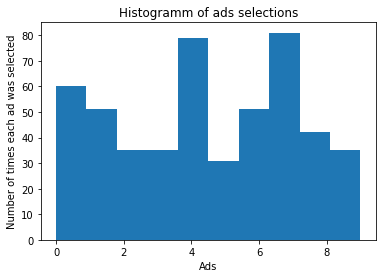

In [31]:
plt.hist(ads_selected)
plt.title('Histogramm of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

Wir können anhand des Histogramms erkennen, dass der UCB-Algoritmus einen klaren Favoriten erkoren hat. Ads Nummer 4 scheint mit Abstand am beliebtesten zu sein. Was wir hier auch klar erkennen können ist, dass UCB auch mit weniger Runden auskommen würde, was natürlich unser Ziel wäre.
Wie es scheint könnten wir es wagen, die Rudenzahl auf 1000 zu reduzieren, was zu folgendem Resultat geführt hat:

<img src='https://github.com/sakuronohana/my_datascience/blob/master/udemy/mlaz/Part%206%20-%20Reinforcement%20Learning/Section%2032%20-%20Upper%20Confidence%20Bound%20(UCB)/UCB_Hist_Result.jpg?raw=true' width='400'>

Wir könnten jetzt sicher noch etwas optimieren, jedoch spätenstens bei einer Rundenanzahl von 500 ist Schluss:

<img src='https://github.com/sakuronohana/my_datascience/blob/master/udemy/mlaz/Part%206%20-%20Reinforcement%20Learning/Section%2032%20-%20Upper%20Confidence%20Bound%20(UCB)/UCB_Hist_Result_2.png?raw=true' width='400'>